In [1]:
import pandas as pd
from datetime import datetime
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats 
from sklearn.preprocessing import LabelEncoder

In [2]:
db = pd.read_csv("Health Expense Data.csv")

In [3]:
db.shape

(1338, 6)

In [4]:
db.describe()

,age,sex,bmi,children,smoker,Expenses
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.665471,1.094918,0.204783,13270.422414
std,14.049960,0.500160,6.098382,1.205493,0.403694,12110.011240
min,18.000000,0.000000,16.000000,0.000000,0.000000,1121.870000
25%,27.000000,0.000000,26.300000,0.000000,0.000000,4740.287500
50%,39.000000,1.000000,30.400000,1.000000,0.000000,9382.030000
75%,51.000000,1.000000,34.700000,2.000000,0.000000,16639.915000
max,64.000000,1.000000,53.100000,5.000000,1.000000,63770.430000


In [24]:
db.dtypes

age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
Expenses    float64
dtype: object

In [19]:
missing_values = db.isnull().sum()
missing_values

age         0
sex         0
bmi         0
children    0
smoker      0
Expenses    0
dtype: int64

In [5]:
#Calculate mean and standard deviation of medical expenses. 
mean_expenses = db["Expenses"].mean()
std_expenses = db["Expenses"].std()
print("Mean is ",mean_expenses)
print("Std is ",std_expenses)

Mean is  13270.422414050823
Std is  12110.011239706457


In [6]:
#Calculate upper and lower limits and also checks the data within those limits, in percentage.
lower_limit = mean_expenses - 3 * std_expenses
upper_limit = mean_expenses + 3 * std_expenses
print("Lower limit is: ", lower_limit, "Upper Limit is: ", upper_limit)
(((db["Expenses"] >= lower_limit) & (db["Expenses"] <= upper_limit)).mean() * 100)

Lower limit is:  -23059.611305068545 Upper Limit is:  49600.45613317019


99.47683109118086

In [32]:
#Remove Outliers
final_db = db[(db['Expenses'] <= upper_limit)]

In [33]:
final_db.shape

(1331, 6)

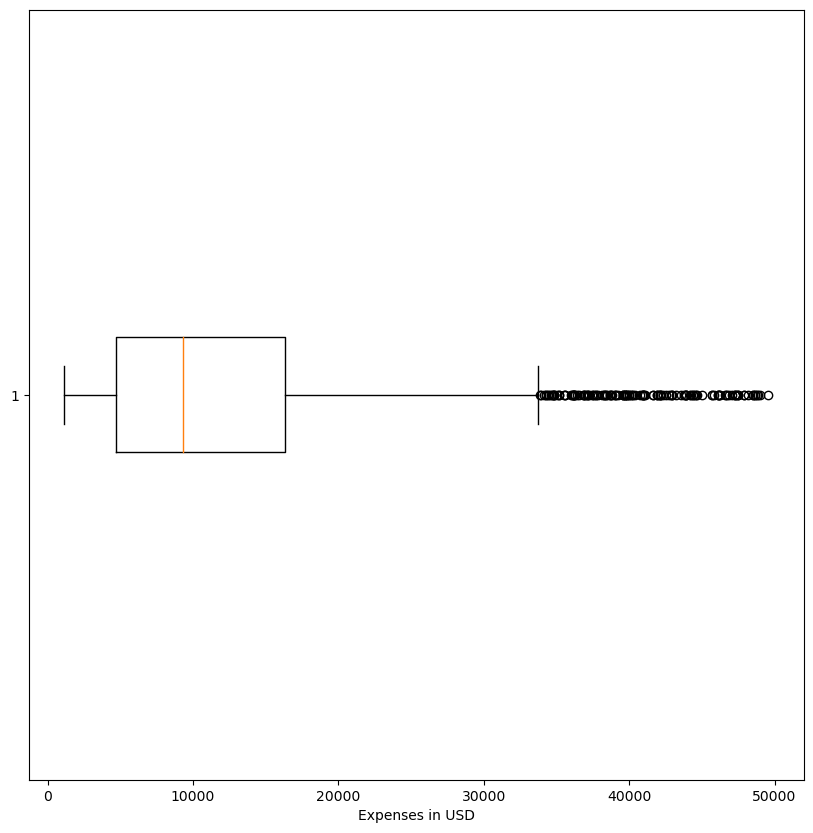

In [14]:
#Box Plot of the medical expenses. 
fig = plt.figure(figsize=(10,10))
plt.boxplot(final_db['Expenses'], vert=False)
plt.xlabel('Expenses in USD')
plt.show()

In [9]:
final_db.describe()

,age,sex,bmi,children,smoker,Expenses
count,1331.000000,1331.000000,1331.000000,1331.00000,1331.000000,1331.000000
mean,39.185575,0.504884,30.635086,1.09692,0.200601,13036.775830
std,14.058021,0.500164,6.089017,1.20603,0.400601,11699.360346
min,18.000000,0.000000,16.000000,0.00000,0.000000,1121.870000
25%,26.000000,0.000000,26.200000,0.00000,0.000000,4719.630000
50%,39.000000,1.000000,30.300000,1.00000,0.000000,9301.890000
75%,51.000000,1.000000,34.600000,2.00000,0.000000,16359.170000
max,64.000000,1.000000,53.100000,5.00000,1.000000,49577.660000


In [10]:
final_db.head()

,age,sex,bmi,children,smoker,Expenses
0,19,0,27.9,0,1,16884.92
1,18,1,33.8,1,0,1725.55
2,28,1,33.0,3,0,4449.46
3,33,1,22.7,0,0,21984.47
4,32,1,28.9,0,0,3866.86


<Axes: >

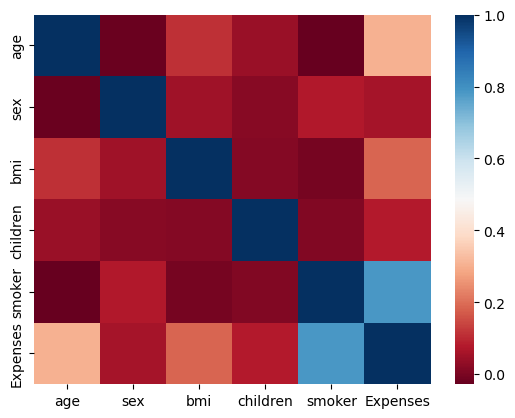

In [11]:
corr = final_db.corr()
sns.heatmap(corr, cmap='RdBu')

In [12]:
smokers = final_db['smoker'].sum()
print('There are',smokers,'smokers.')

There are 267 smokers.


Text(0, 0.5, 'Patients')

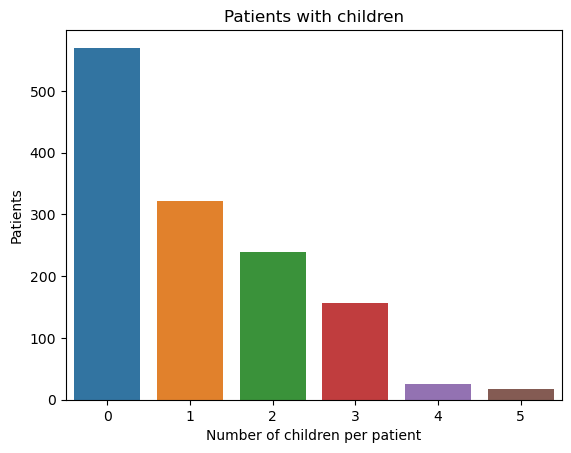

In [21]:
children_counts = final_db['children'].value_counts().reset_index()
children_counts.columns = ['children', 'count']
sns.barplot(x = "children" , y = "count", data = children_counts)
plt.title('Patients with children')
plt.xlabel('Number of children per patient')
plt.ylabel('Patients')

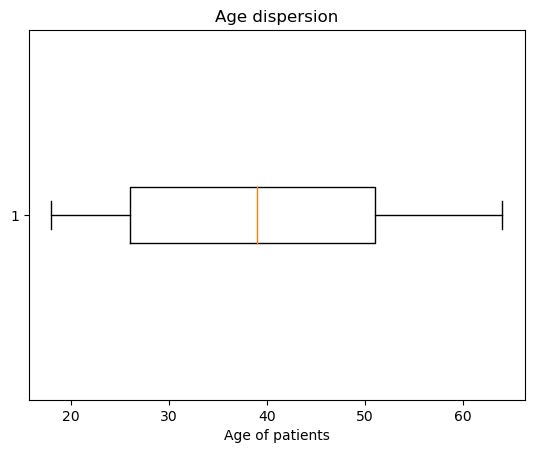

In [23]:
plt.boxplot(final_db['age'], vert=False)
plt.xlabel('Age of patients')
plt.title('Age dispersion')
plt.show()

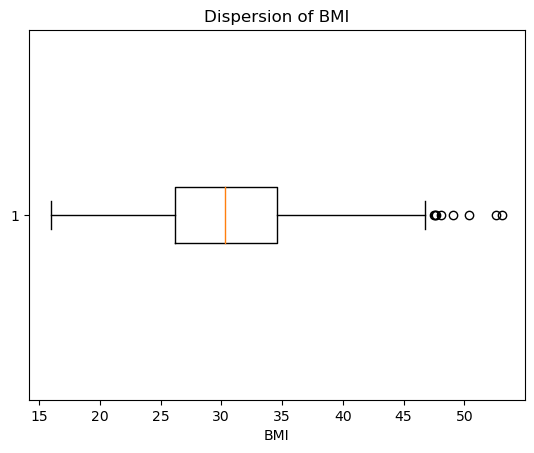

In [22]:
plt.boxplot(final_db['bmi'], vert=False)
plt.xlabel('BMI')
plt.title('Dispersion of BMI')
plt.show()

Text(0, 0.5, 'Counts')

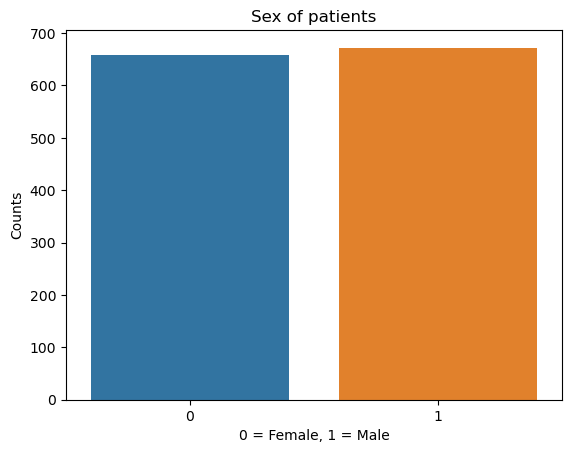

In [30]:
sex_counts = final_db['sex'].value_counts().reset_index()
sex_counts.columns = ['sex', 'count']
sns.barplot(x = "sex" , y = "count", data = sex_counts)
plt.title('Sex of patients')
plt.xlabel('0 = Female, 1 = Male')
plt.ylabel('Counts')